### Importing the neccesary modules 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Global+Superstore+Data.csv')

In [3]:
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


### Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()
# Soo no null values data is already cleaned

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [6]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [7]:
# Different market and customer segments
df['Market'].unique()

#  7 places = 'US' , 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

In [8]:
df['Segment'].unique()

# 3  segements = ['Consumer', 'Corporate', 'Home Office']
# In total 21 unique segements

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

### Finding out the most profitable market segement

In [9]:
df['combinedMarketSegment'] = df['Market'] + '-' + df['Segment']

In [10]:
df.head()
# cross checking

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [11]:
# next converting the dataset
# converting the date into the required format
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
# to_period m convert to month

C:\Users\SAM\AppData\Local\Temp\ipykernel_8264\3464277095.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')


In [12]:
df_agg = df.pivot_table(index='Order Date', values='Profit',columns='combinedMarketSegment',aggfunc='sum')
# as we are only concerned with the profit

In [13]:
df_agg.head()

combinedMarketSegment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [14]:
df_agg.shape

(48, 21)

In [15]:
# Train - test Split
train_len = 42
train_df = df_agg[0 : train_len]
test_df = df_agg[train_len :]

In [16]:
train_df.shape

(42, 21)

In [17]:
test_df.shape
# combined is 48

(6, 21)

In [18]:
# Finding our the covariance
mean = np.mean(train_df)
std = np.std(train_df)
convariance_df =pd.DataFrame(mean)
convariance_df['std'] = std
convariance_df['covariance'] = std / mean
convariance_df.sort_values(by='covariance',ascending=True)
convariance_df

c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,0,std,covariance
combinedMarketSegment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
APAC-Home Office,1511.088314,1523.508658,1.008219
Africa-Consumer,957.707000,1254.932072,1.310351
Africa-Corporate,412.617571,780.566850,1.891744
Africa-Home Office,377.221071,759.322203,2.012937
Canada-Consumer,225.987632,282.555788,1.250315
Canada-Corporate,90.980294,162.493114,1.786025
Canada-Home Office,118.003750,279.632866,2.369695


### Inference
#### APAC - Consumer has the lowest covariance 0.522725
hence we should focus on this sector as we want the least variance in our profits

### Model building and evaluation

In [19]:
df.dtypes

Order Date               period[M]
Segment                     object
Market                      object
Sales                      float64
Profit                     float64
combinedMarketSegment       object
dtype: object

In [20]:
#  convert to timestamp
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [21]:
df['Order Date'].dtype

dtype('<M8[ns]')

In [23]:
df['combinedMarketSegment' ==]

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
0,2012-07-01,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05-01,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10-01,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05-01,Consumer,Africa,2832.960,311.5200,Africa-Consumer
...,...,...,...,...,...,...
51285,2014-06-01,Corporate,APAC,65.100,4.5000,APAC-Corporate
51286,2014-06-01,Consumer,US,0.444,-1.1100,US-Consumer
51287,2013-02-01,Home Office,US,22.920,11.2308,US-Home Office
51288,2012-02-01,Home Office,LATAM,13.440,2.4000,LATAM-Home Office


In [24]:
#  Getting rid of all the other sectors other than 'APAC_Consumer'
retail_df = df[(df['combinedMarketSegment'] =='APAC-Consumer')]
retail_df.head()

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
2,2013-10-01,Consumer,APAC,5175.171,919.971,APAC-Consumer
6,2011-07-01,Consumer,APAC,1822.080,564.840,APAC-Consumer
7,2012-04-01,Consumer,APAC,5244.840,996.480,APAC-Consumer
14,2013-06-01,Consumer,APAC,3701.520,1036.080,APAC-Consumer
29,2012-02-01,Consumer,APAC,1878.720,582.360,APAC-Consumer


In [25]:
retail_df

,Order Date,Segment,Market,Sales,Profit,combinedMarketSegment
2,2013-10-01,Consumer,APAC,5175.1710,919.9710,APAC-Consumer
6,2011-07-01,Consumer,APAC,1822.0800,564.8400,APAC-Consumer
7,2012-04-01,Consumer,APAC,5244.8400,996.4800,APAC-Consumer
14,2013-06-01,Consumer,APAC,3701.5200,1036.0800,APAC-Consumer
29,2012-02-01,Consumer,APAC,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...,...,...
51215,2013-01-01,Consumer,APAC,38.9709,-32.3991,APAC-Consumer
51234,2014-12-01,Consumer,APAC,6.9000,-0.8400,APAC-Consumer
51235,2011-03-01,Consumer,APAC,17.2800,-13.9200,APAC-Consumer
51236,2013-07-01,Consumer,APAC,30.6180,1.0080,APAC-Consumer


In [26]:
data = pd.DataFrame(retail_df.groupby('Order Date')['Sales'].sum())

In [27]:
data

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


## Time Series Analysis

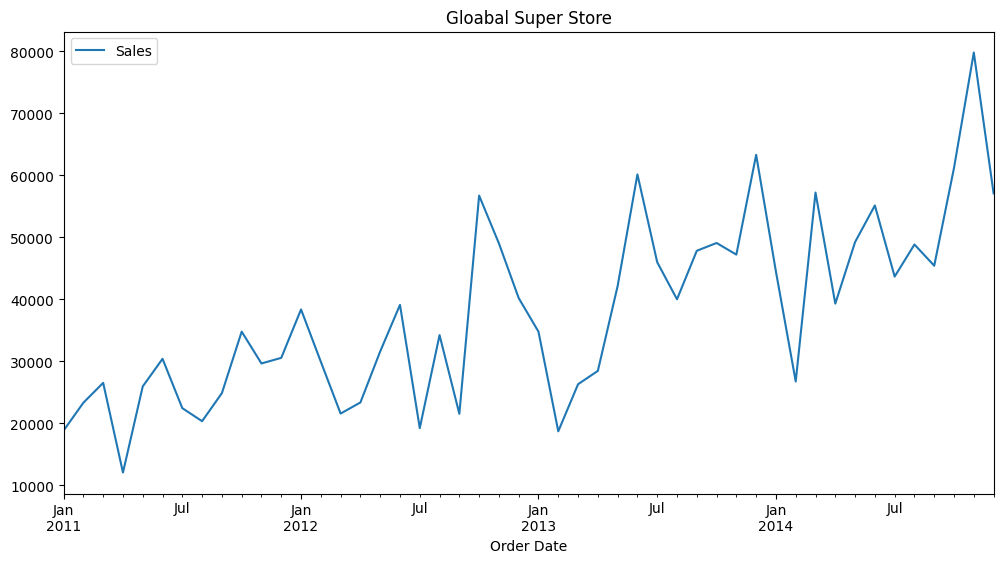

In [29]:
data.plot(figsize=(12,6))
plt.legend(loc ='best')
plt.title('Gloabal Super Store')
plt.show()

### Decomposition

In [31]:
from pylab import rcParams
# so that we can set a default value for the parameters
import statsmodels.api as sm

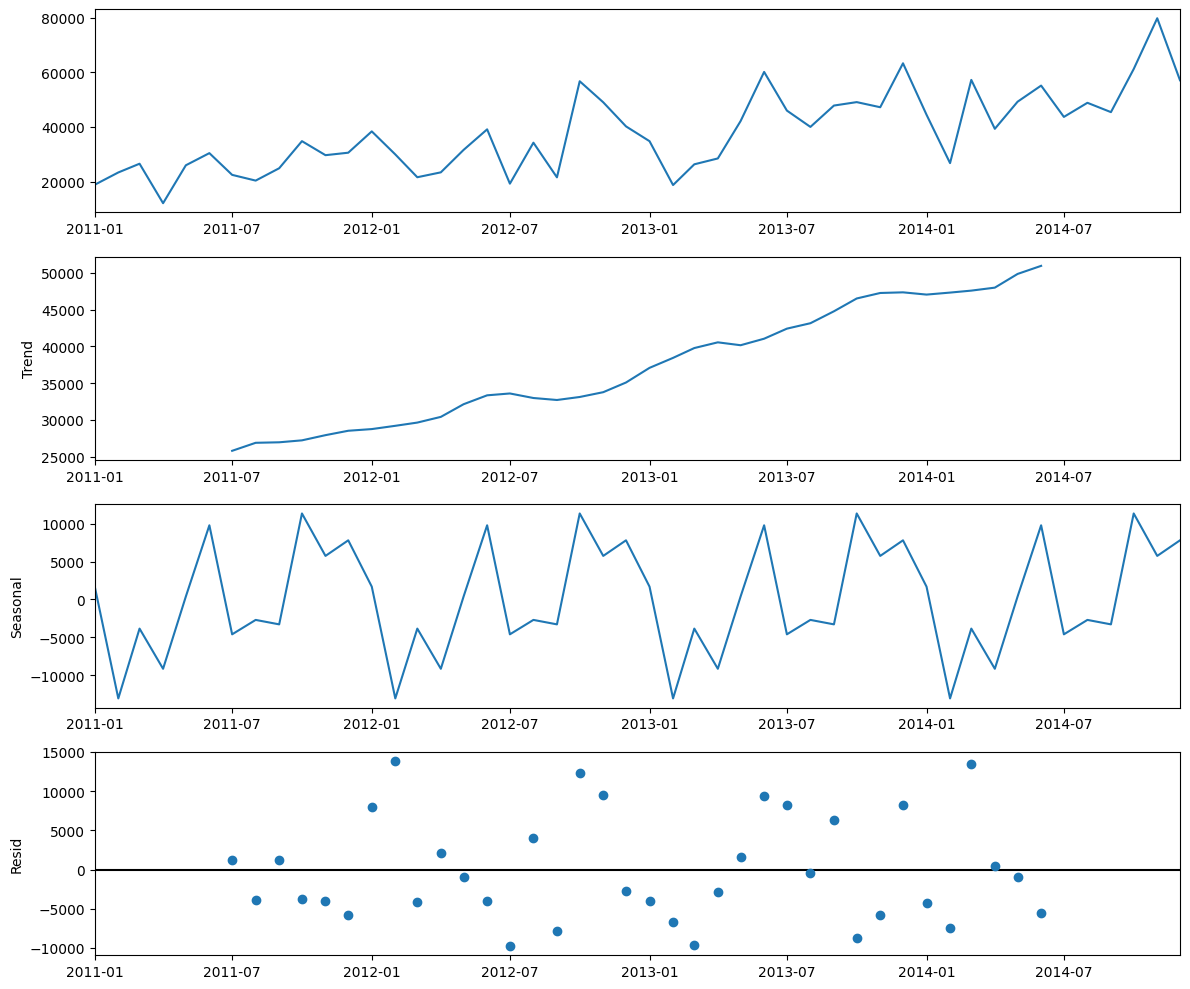

In [35]:
rcParams['figure.figsize'] = 12,10
decompostion = sm.tsa.seasonal_decompose(data,model='additive')
fig = decompostion.plot()
plt.show()

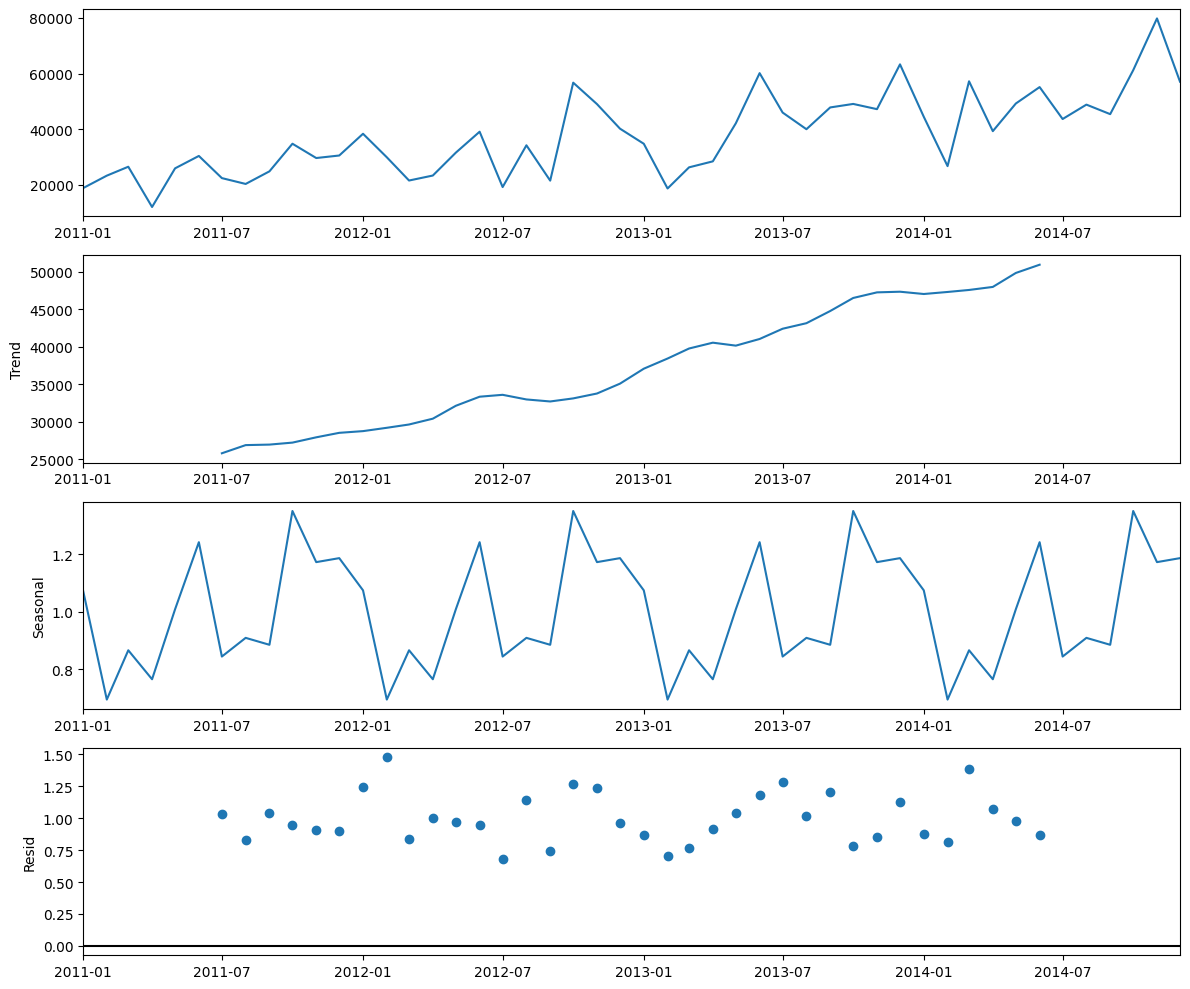

In [37]:
# Multiplicative seasonal decompostion
decompostion = sm.tsa.seasonal_decompose(data,model='multiplicative')
fig =decompostion.plot()
plt.show()

#### Building Simple time Series forcasts

In [38]:
train_len = 42
train_df = data[0:train_len]
test_df = data[train_len :]

In [39]:
train_df

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000
2011-06-01,30398.9316
2011-07-01,22431.5949
2011-08-01,20331.0735
2011-09-01,24860.3949


In [40]:
test_df

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295
2014-12-01,57099.9858


### Simple time Series Methods

In [41]:
y_hat_naive = test_df.copy()
y_hat_naive['native_forcast'] = train_df['Sales'][train_len - 1]

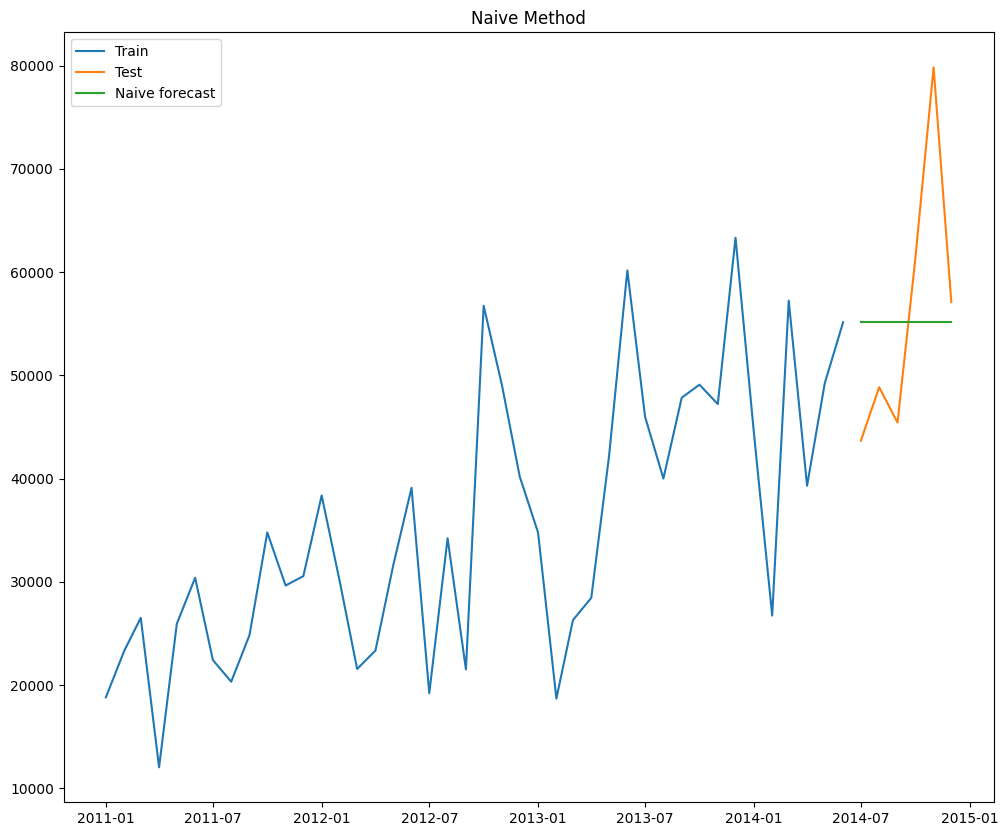

In [42]:
# Plotting
plt.plot(train_df['Sales'],label ='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_naive['native_forcast'],label ='Naive forecast')
plt.legend(loc ='best')
plt.title('Naive Method')
plt.show()

In [44]:
# Calculating RSME AND MAPE
from sklearn.metrics import mean_squared_error
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_naive['native_forcast'])).round(2)
mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_naive['native_forcast'])/test_df['Sales'])* 100,2)
results = pd.DataFrame({'Method':['Naive Method'],'MAPE':[mape],'RSME':[rsme]})
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97


### Simple average Method

In [45]:
y_hat_avg = test_df.copy()
y_hat_avg['avg_forcast'] = train_df['Sales'].mean()

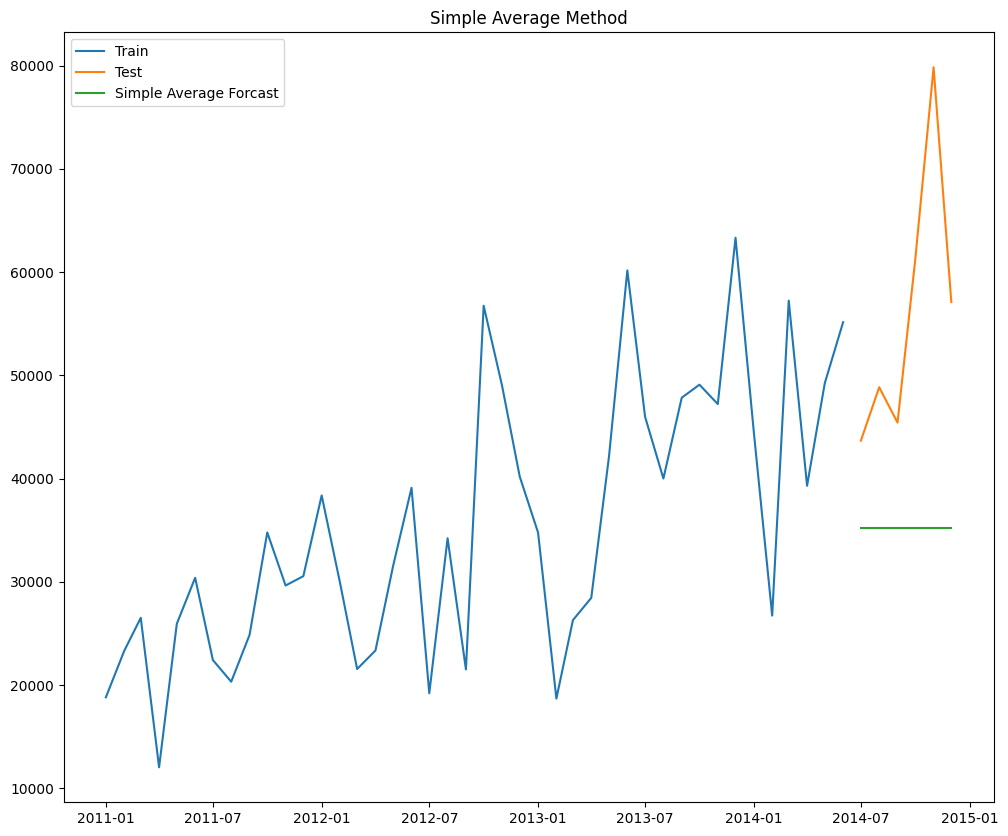

In [47]:
# Plotting
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_avg['avg_forcast'],label='Simple Average Forcast')
plt.legend(loc ='best')
plt.title('Simple Average Method')
plt.show()
# this one's worse

In [48]:
#  Calculate RMSE and MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_avg['avg_forcast'])).round(2)
mape =np.round(np.mean(np.abs(test_df['Sales']-y_hat_avg['avg_forcast'])/ test_df['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple average Method'],'MAPE':[mape],'RSME':[rsme]})
results =pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06


### Simple Moving average

In [49]:
y_hat_sma = data.copy()
#  we have to take for the entire data set
ma_window = 12
y_hat_sma['sma_forcast'] = data['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forcast'][train_len] = y_hat_sma['sma_forcast'][train_len -1]
# to make sure it cannot see the test data

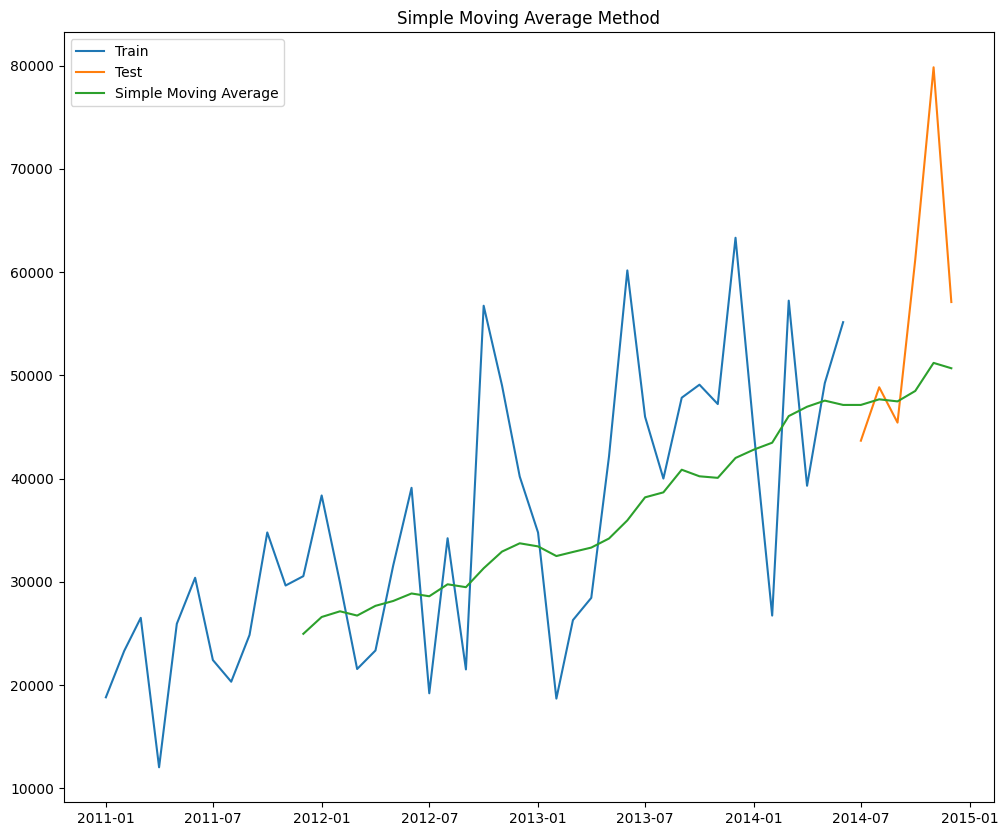

In [50]:
plt.plot(train_df['Sales'],label='Train')
plt.plot(test_df['Sales'],label ='Test')
plt.plot(y_hat_sma['sma_forcast'],label ='Simple Moving Average')
plt.legend(loc ='best')
plt.title('Simple Moving Average Method')
plt.show()

In [51]:
## Calculate RSME AND MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_sma['sma_forcast'][train_len:])).round(2)

mape =np.round(np.mean(np.abs(test_df['Sales']-y_hat_sma['sma_forcast'][train_len:])/ test_df['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average Method'],'MAPE':[mape],'RSME':[rsme]})

results =pd.concat([results,tempResults])
results


,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96


### Exponential smoothing

In [53]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_df['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test_df.copy()
y_hat_ses['ses_forcast'] = model_fit.forecast(24)

c:\sahil\code\upgrad\assignment\Global_Mart\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


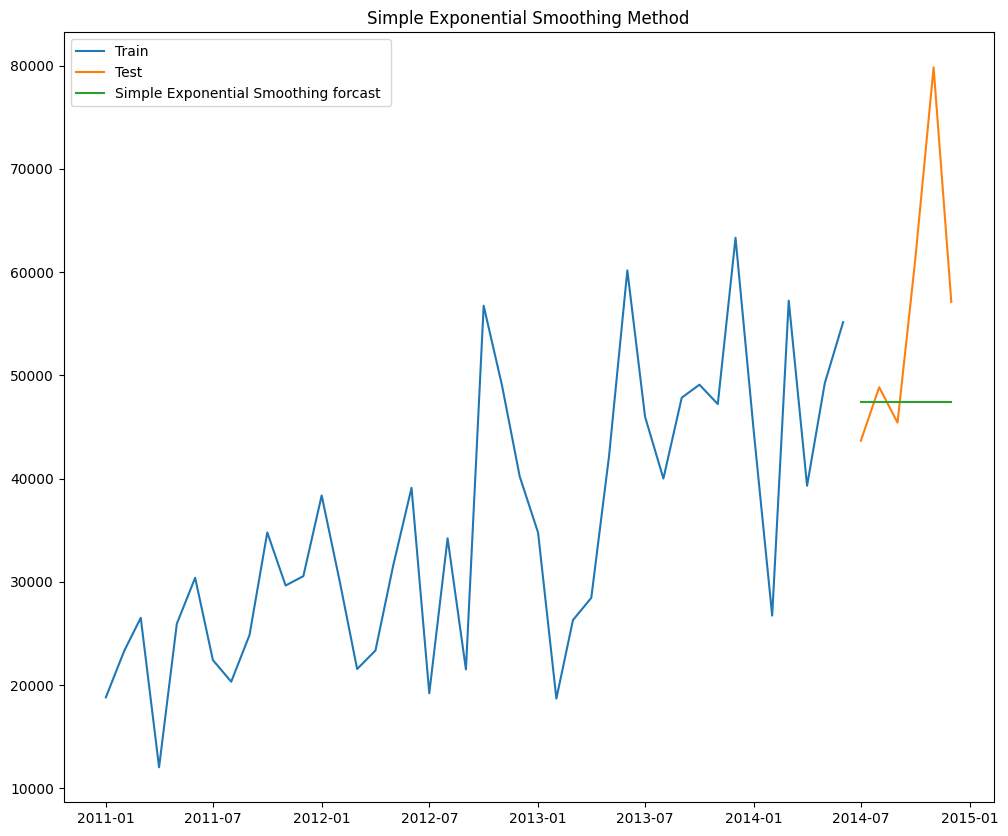

In [54]:
# Plot 
plt.plot(train_df['Sales'],label ='Train')
plt.plot(test_df['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forcast'],label = 'Simple Exponential Smoothing forcast ')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [55]:
#  Calcualte RSME AND MAPE
rsme = np.sqrt(mean_squared_error(test_df['Sales'],y_hat_ses['ses_forcast'])).round(2)

mape = np.round(np.mean(np.abs(test_df['Sales']-y_hat_ses['ses_forcast'])/test_df['Sales'])* 100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential Smoothing forcast'],'MAPE':[mape],'RSME':[rsme]})

results = pd.concat([results,tempResults])
results

,Method,MAPE,RSME
0,Naive Method,17.47,12355.97
0,Simple average Method,34.34,24146.06
0,Simple moving average Method,13.79,13167.96
0,Simple Exponential Smoothing forcast,15.99,15011.49


## Holts method with trend